INFO:mira.topic_model.base:Moving model to CPU for inference.
INFO:mira.topic_model.base:Moving model to device: cpu
INFO:mira.topic_model.base:Moving model to CPU for inference.
INFO:mira.topic_model.base:Moving model to device: cpu


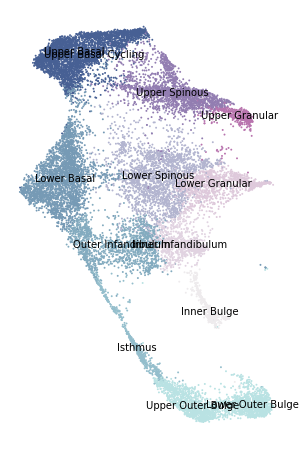

In [1]:
import mira
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mira.plots.base import map_plot
mira.utils.wide_view()
from IPython.display import Image
import os

DIR = '/Users/alynch/Dropbox (Partners HealthCare)/shareseq_code_ocean/'
RESULTS = 'data/code_ocean_results/'
for fig in ['fig5','fig2','fig3','fig4']:
    p = os.path.join(RESULTS, fig)
    if not os.path.exists(p):
        os.mkdir(p)

rna_data = sc.read_h5ad(os.path.join(DIR, 'checkpoint_rna_data.h5ad'))
atac_data = sc.read_h5ad(os.path.join(DIR, 'checkpoint_atac_data.h5ad'))

rna_model = mira.topics.ExpressionTopicModel.load(os.path.join(DIR, 'shareseq_rna_model_rev1.pth'))
atac_model = mira.topics.AccessibilityTopicModel.load(os.path.join(DIR, 'shareseq_atac_model_rev1.pth'))
atac_model.encoder.calc_readdepth = False

rna_data.layers['counts'] = rna_data.X.copy()
sc.pp.normalize_total(rna_data, target_sum=1e4, layer = None)
rna_data.layers['normalized'] = rna_data.X.copy()
rna_data.X = rna_data.layers['counts']
rna_data.layers['smoothed'] = rna_data.obsp['connectivities'].dot(rna_data.layers['normalized'])/30 #knn smooth for visualization

with open(DIR + 'HF_cells.txt', 'r') as f:
    hf_cells = [x.strip() for x in f]

from collections import defaultdict

vaporwave_colormap = defaultdict(lambda : 'white')
vaporwave_colormap.update({
    'Upper Granular' : '#B874AE',
    'Upper Spinous' : '#927DB1',
    'Upper Basal' : '#476094',
    'Lower Granular' : '#DEC9DB',
    'Lower Spinous' : '#B2B4CF',
    'Lower Basal' : '#769AB5',
    'Outer Infandibulum' : '#83ABBF',
    'Infandibulum' : '#A2BBD8',
    'Inner Infandibulum' : '#E1D3E1',
    'Isthmus' : '#94BECC',
    'Inner Bulge' : '#EEEBED',
    'Upper Basal Cycling' : '#476094',
    'Upper Outer Bulge' : '#B9E2E3',
    'Lower Outer Bulge' : '#B9E2E3'
})

keratinocytes = rna_data[rna_data.obs.true_cell.isin(vaporwave_colormap.keys()) & (rna_data.obsm['joint_umap'][:,0] > 5)]

keratinocytes.obsm['joint_umap']*=np.array([[-1,1]])

fig, ax = plt.subplots(1,1,figsize=(5,8))
sc.pl.embedding(keratinocytes, basis='joint_umap', color = 'true_cell', palette=vaporwave_colormap, show = False, title = '',
               na_color='lightgrey', ax = ax, size = 15, frameon=False, legend_loc='on data', legend_fontweight=530)

plt.savefig(os.path.join(RESULTS, 'fig5', '5a.png'), bbox_inches='tight')

Trying to set attribute `._uns` of view, copying.
Trying to set attribute `._uns` of view, copying.


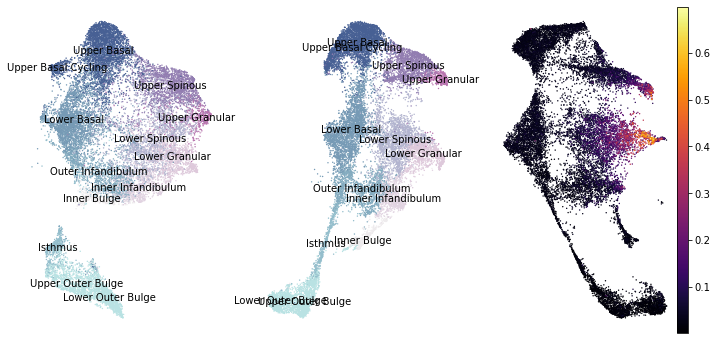

In [2]:
fig, ax = plt.subplots(1,3,figsize = (12,6))
sc.pl.embedding(keratinocytes[(keratinocytes.obsm['rna_only_umap'][:,0] > 4) & (keratinocytes.obsm['rna_only_umap'][:,1] > 0)], basis='rna_only_umap', color = 'true_cell', 
                palette=vaporwave_colormap, show = False, title = '',
               na_color='lightgrey', ax = ax[0], size = 8, frameon=False, legend_loc='on data', legend_fontweight=0)

sc.pl.embedding(keratinocytes[~((keratinocytes.obsm['atac_only_umap'][:,0] < 7) & (keratinocytes.obsm['atac_only_umap'][:,1] > 0))], basis='atac_only_umap', color = 'true_cell', 
                palette=vaporwave_colormap, show = False, title = '',
               na_color='lightgrey', ax = ax[1], size = 8, frameon=False, legend_loc='on data', legend_fontweight=0)

sc.pl.embedding(keratinocytes, basis='joint_umap', color = 'topic_13', show = False, title = '', color_map = 'inferno',
               na_color='lightgrey', ax = ax[2], size = 8, frameon=False, legend_loc = 'center bottom')
plt.savefig(os.path.join(RESULTS, 'fig5', '5cde.png'), bbox_inches='tight')

INFO:charset_normalizer:ascii passed initial chaos probing. Mean measured chaos is 0.000000 %
INFO:charset_normalizer:ascii should target any language(s) of ['Latin Based']
INFO:charset_normalizer:We detected language [('English', 1.0), ('Italian', 1.0), ('French', 1.0), ('Dutch', 1.0), ('Swedish', 1.0), ('Simple English', 1.0), ('Indonesian', 0.9848)] using ascii
INFO:charset_normalizer:ascii is most likely the one. Stopping the process.


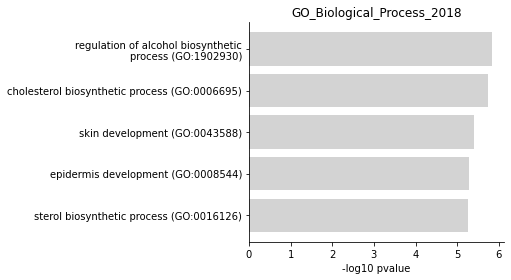

In [3]:
_id = rna_model.post_topic(13, 500)
rna_model.fetch_topic_enrichments(13, ontologies=['GO_Biological_Process_2018'])

rna_model.plot_enrichments(13, show_top = 5, color_by_adj=False,
                          aspect=1.8, show_genes = False)
plt.savefig(os.path.join(RESULTS, 'fig5', '5f.svg'), bbox_inches='tight')

INFO:root:Added key to obsm: X_diffmap, normalized diffmap with 14 components.
INFO:root:Added key to uns: eigen_gap


Recommending 7 diffusion map components.


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
INFO:mira.pseudotime.pseudotime:Found 1 components of KNN graph.
INFO:mira.adata_interface.core:Added cols to obs: mira_connected_components
INFO:mira.pseudotime.pseudotime:Calculating inter-cell distances ...
Calculating pseudotime:   8%|███████████                                                                                                                               | 4865/60800 [00:01<00:17, 3188.43it/s]
INFO:mira.pseudotime.pseudotime:Calculating transport map ...
/Users/alynch/projects/multiomics/mira/mira/mira/pseudotime/pseudotime.py:290: RuntimeWarning: divide by zero encountered in true_divide
  inverse_rowsums = sparse.diags(1/np.array(affinity_matrix.sum(axis = 1)).reshape(-1)).tocsr()
INFO:mira.adata_interface.pseudotime:Added key to obs: mira_pseudotime
INFO:mira.adata_interface.pseudotime:Added key to obsp: transport_map
INFO:mira.adata_interface.pseudotime:Added key to 

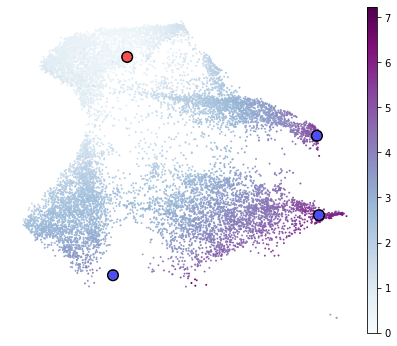

In [4]:
epidermis = keratinocytes[keratinocytes.obs.true_cell.str.contains('Basal|Spinous|Granular')].copy()

sc.tl.diffmap(epidermis)
mira.time.normalize_diffmap(epidermis)

sc.pp.neighbors(epidermis, n_pcs=4, use_rep='X_diffmap', key_added='X_diffmap')

mira.time.get_connected_components(epidermis)

mira.time.get_transport_map(epidermis, n_jobs=8,
                            start_cell=int(epidermis.obs.topic_19.argmax()))

terminal_cells = mira.time.find_terminal_cells(epidermis, threshold=1e-3)

terminal_cells = ['R1.09.R2.90.R3.42.P1.54', 'R1.31.R2.13.R3.49.P1.54',
       'R1.68.R2.05.R3.36.P1.53']

fig, ax = plt.subplots(1,1,figsize= (7,6))
sc.pl.embedding(epidermis, color = 'mira_pseudotime', color_map = 'BuPu', 
               basis = 'joint_umap', title = '', ax = ax, show = False, size = 15)
sc.pl.embedding(epidermis[epidermis.uns['start_cell']], frameon = False, na_color = 'Red',
               basis = 'joint_umap', title = '', ax = ax, show = False, size = 300, 
               add_outline=True, outline_color=('black','white'), outline_width=(0.2,0))
sc.pl.embedding(epidermis[terminal_cells], frameon = False, na_color = 'Blue',
               basis = 'joint_umap', title = '', ax = ax, show = False, size = 300, 
               add_outline=True, outline_color=('black','white'), outline_width=(0.2,0))
plt.savefig(os.path.join(RESULTS, 'fig5', '5g.png'), bbox_inches='tight')

In [5]:
mira.time.get_branch_probabilities(epidermis, 
                                  terminal_cells={
                                      'Upper Granular' : terminal_cells[0],
                                      'Lower Granular' : terminal_cells[2],
                                  })

INFO:mira.pseudotime.pseudotime:Simulating random walks ...
/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/site-packages/scipy/stats/_entropy.py:72: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)
INFO:mira.adata_interface.pseudotime:Added key to obsm: branch_probs
INFO:mira.adata_interface.pseudotime:Added key to uns: lineage_names
INFO:mira.adata_interface.core:Added cols to obs: Upper Granular_prob
INFO:mira.adata_interface.core:Added cols to obs: Lower Granular_prob
INFO:mira.adata_interface.core:Added cols to obs: differentiation_entropy


INFO:mira.adata_interface.pseudotime:Added key to obs: tree_states
INFO:mira.adata_interface.pseudotime:Added key to uns: tree_state_names
INFO:mira.adata_interface.pseudotime:Added key to uns: connectivities_tree


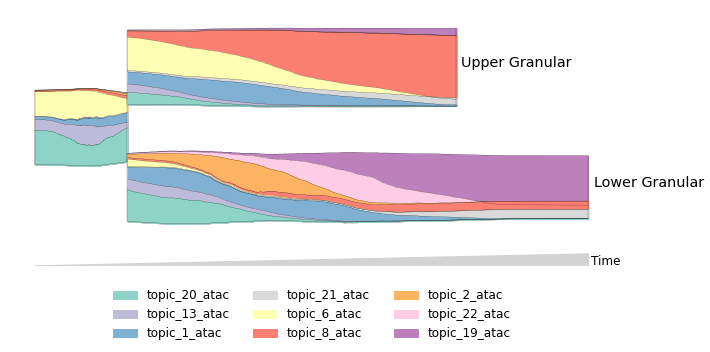

In [6]:
mira.time.get_tree_structure(epidermis, threshold = 1.5)
epidermis.obs['tree_states'] = np.where(epidermis.obs.tree_states.str.contains(',') & (epidermis.obs.mira_pseudotime > 1.2094), np.nan, epidermis.obs.tree_states)

stream_palette = [sns.color_palette('Set3')[i] for i in 
                  [0,2,4,-4,1,3,5,-5,-3]]
mira.pl.plot_stream(epidermis, window_size = 601, max_bar_height = 0.7, hide_feature_threshold=0,
        data = ['topic_{}_atac'.format(str(i)) for i in [20,13,1,21,6,8,2,22,19,]], 
        log_pseudotime=False, linewidth=0.2, legend_cols=3, palette = stream_palette, order = None)
plt.savefig(os.path.join(RESULTS, 'fig5', '5h.svg'), bbox_inches='tight')

Trying to set attribute `.obs` of view, copying.
INFO:mira.adata_interface.lite_nite:Added keys to obs: NITE_score, nonzero_counts
INFO:mira.adata_interface.lite_nite:Added keys to var: NITE_score, nonzero_counts
INFO:mira.adata_interface.core:Added layer: chromatin_differential


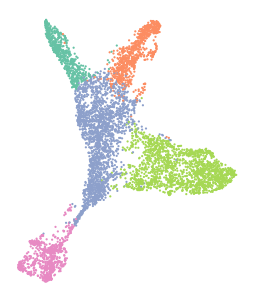

In [7]:
populations = ['Cortex', 'IRS', 'Inner Bulge', 'Inner Infandibulum',
       'Inner Matrix', 'Isthmus', 'Lower Basal', 'Lower Granular',
       'Lower Outer Bulge', 'Lower Spinous', 'Matrix', 'Medulla', 'ORS',
       'Outer Infandibulum', 'Outer Matrix', 'Upper Basal',
       'Upper Basal Cycling', 'Upper Granular', 'Upper Outer Bulge',
       'Upper Spinous']

rna_data = rna_data[rna_data.obs.true_cell.isin(populations)]
atac_data = atac_data[rna_data.obs_names]

mira.tl.get_NITE_score_cells(rna_data)
mira.tl.get_NITE_score_genes(rna_data)
mira.tl.get_chromatin_differential(rna_data)

hair_follicle = rna_data[hf_cells]

sc.pp.neighbors(hair_follicle, metric='manhattan', use_rep='X_joint_umap_features', n_neighbors = 30)
sc.tl.umap(hair_follicle, min_dist=0.1)

def rot_matrix(deg):
    theta = np.radians(deg)
    c, s = np.cos(theta), np.sin(theta)
    return np.array(((c, -s), (s, c)))

hair_follicle.obsm['vertical_umap'] = hair_follicle.obsm['X_umap'].dot(rot_matrix(35))*np.array([[-1,1]])
hair_follicle.obsm['horizontal_umap'] = hair_follicle.obsm['X_umap'].dot(rot_matrix(90+35))*np.array([[1,-1]])

hair_follicle_palette = dict(zip(
    hair_follicle.obs.true_cell.cat.categories,
    [sns.color_palette('Set2')[i] for i in [1, 4, 3, 2, 2, 0, 3, 4]]
))

fig, ax = plt.subplots(1,1,figsize=(4.3,5.3))
sc.pl.embedding(hair_follicle, basis='vertical_umap', color = 'true_cell', frameon=False,
          palette = hair_follicle_palette, ax = ax, legend_loc='center bottom', title = '', show = False)
plt.savefig(os.path.join(RESULTS, 'fig2', '2a.png'), bbox_inches='tight')

INFO:root:Added key to obsm: X_diffmap, normalized diffmap with 14 components.
INFO:root:Added key to uns: eigen_gap


Recommending 5 diffusion map components.


INFO:mira.pseudotime.pseudotime:Found 1 components of KNN graph.
INFO:mira.adata_interface.core:Added cols to obs: mira_connected_components
INFO:mira.pseudotime.pseudotime:Calculating inter-cell distances ...
Calculating pseudotime:   8%|███████████                                                                                                                               | 4449/55600 [00:00<00:06, 7628.11it/s]
INFO:mira.pseudotime.pseudotime:Calculating transport map ...
INFO:mira.adata_interface.pseudotime:Added key to obs: mira_pseudotime
INFO:mira.adata_interface.pseudotime:Added key to obsp: transport_map
INFO:mira.adata_interface.pseudotime:Added key to uns: start_cell
/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder

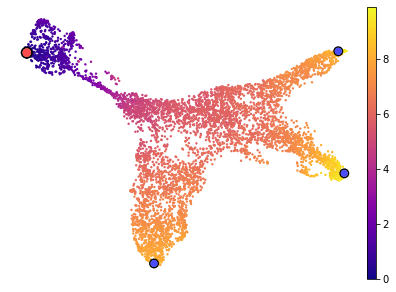

In [8]:
sc.tl.diffmap(hair_follicle)
mira.time.normalize_diffmap(hair_follicle)

sc.pp.neighbors(hair_follicle, n_neighbors = 30, use_rep = "X_diffmap", key_added = "X_diffmap", n_pcs = 5)
mira.time.get_connected_components(hair_follicle)

mira.time.get_transport_map(hair_follicle, n_jobs = 5,
                            start_cell=int(atac_data[hair_follicle.obs_names].obs.topic_10.argmax()))

terminal_cells = {'Medulla' : 'R1.77.R2.54.R3.21.P1.53', 
                  'Cortex' : 'R1.27.R2.02.R3.01.P1.54', 
                  'IRS' : 'R1.91.R2.89.R3.32.P1.56'}

fig, ax = plt.subplots(1,1,figsize=(7,5))
sc.pl.embedding(hair_follicle, basis='horizontal_umap', size = 23,
                color = 'mira_pseudotime', color_map='plasma', ax = ax, show = False)
sc.pl.embedding(hair_follicle[list(terminal_cells.values())], basis='horizontal_umap', 
                na_color = 'blue', add_outline=True, outline_color=('black','white'), outline_width=(0.2, 0), size = 200,
                ax = ax, show = False)
sc.pl.embedding(hair_follicle[hair_follicle.uns['start_cell']], basis='horizontal_umap', 
                na_color = 'red', add_outline=True, outline_color=('black','white'), outline_width=(0.2, 0), size = 300,
                ax = ax, frameon=False, show = False)
plt.savefig(os.path.join(RESULTS, 'fig2', '2b_top.png'), bbox_inches='tight')

INFO:mira.pseudotime.pseudotime:Simulating random walks ...
INFO:mira.adata_interface.pseudotime:Added key to obsm: branch_probs
INFO:mira.adata_interface.pseudotime:Added key to uns: lineage_names
INFO:mira.adata_interface.core:Added cols to obs: Medulla_prob
INFO:mira.adata_interface.core:Added cols to obs: Cortex_prob
INFO:mira.adata_interface.core:Added cols to obs: IRS_prob
INFO:mira.adata_interface.core:Added cols to obs: differentiation_entropy
/Users/alynch/projects/multiomics/mira/mira/mira/plots/base.py:57: RuntimeWarning: All-NaN slice encountered
  np.nanmin(c) if vmin is None else vmin,
/Users/alynch/projects/multiomics/mira/mira/mira/plots/base.py:58: RuntimeWarning: All-NaN slice encountered
  np.nanmax(c) if vmax is None else vmax),


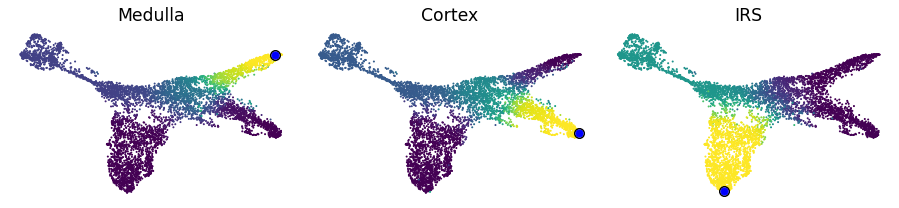

In [9]:
mira.time.get_branch_probabilities(hair_follicle, terminal_cells={'Medulla' : 'R1.77.R2.54.R3.21.P1.53', 
                                                                  'Cortex' : 'R1.27.R2.02.R3.01.P1.54', 
                                                                  'IRS' : 'R1.91.R2.89.R3.32.P1.56'})

def plot_lineage_prob(ax, lineage, terminal_state):
    
    mira.plots.base.plot_umap(hair_follicle.obsm['horizontal_umap'], hair_follicle.obs_vector(lineage + '_prob'), 
                              palette = 'viridis', add_legend=False, ax = ax, size = 1)
    mira.plots.base.plot_umap(hair_follicle[terminal_state].obsm['horizontal_umap'], np.array([np.nan]), 
                              palette = 'viridis', na_color='blue', size = 50, add_legend=False, ax = ax,
                             add_outline=True, outline_color = 'black', outline_width=(0,1))
    ax.set_title(lineage, fontsize = 'xx-large')

mira.plots.base.map_plot(
    plot_lineage_prob, list(zip(hair_follicle.uns['lineage_names'], hair_follicle.uns['terminal_cells'])),
    height = 3, aspect=7/5
)
plt.savefig(os.path.join(RESULTS, 'fig2', '2b_middle.png'), bbox_inches='tight')

INFO:mira.adata_interface.pseudotime:Added key to obs: tree_states
INFO:mira.adata_interface.pseudotime:Added key to uns: tree_state_names
INFO:mira.adata_interface.pseudotime:Added key to uns: connectivities_tree


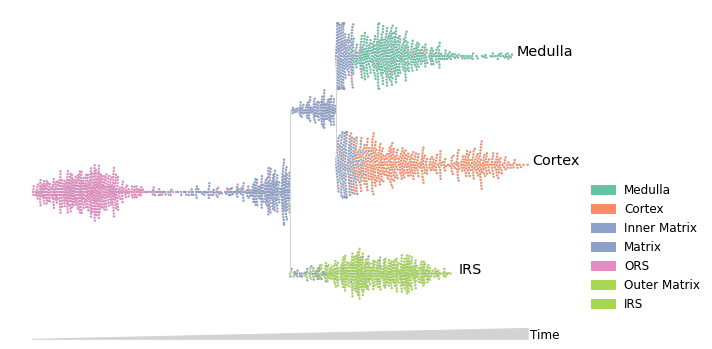

In [10]:
mira.time.get_tree_structure(hair_follicle, threshold=1)

c = sns.color_palette('Set2')
hair_follicle.obs.true_cell = hair_follicle.obs.true_cell.astype(str)
mira.pl.plot_stream(hair_follicle[hair_follicle.obs.true_cell.isin(['Cortex','IRS','Inner Matrix','Matrix', 'Medulla', 'ORS', 'Outer Matrix'])], 
                    data= 'true_cell', style='swarm', log_pseudotime=False, size=5,
                   palette=[c[0],c[1],c[2],c[2],c[3],c[4],c[4]], hue_order=['Medulla','Cortex','Inner Matrix','Matrix','ORS','Outer Matrix','IRS'],
                    max_swarm_density=200, linewidth = 0.1, linecolor = 'grey')
plt.savefig(os.path.join(RESULTS, 'fig2', '2b_bottom.png'), bbox_inches='tight')

/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


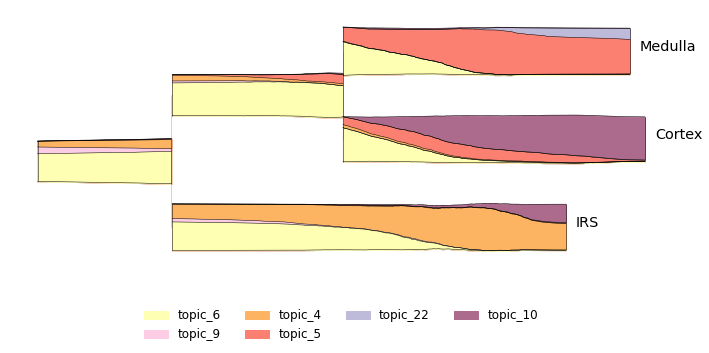

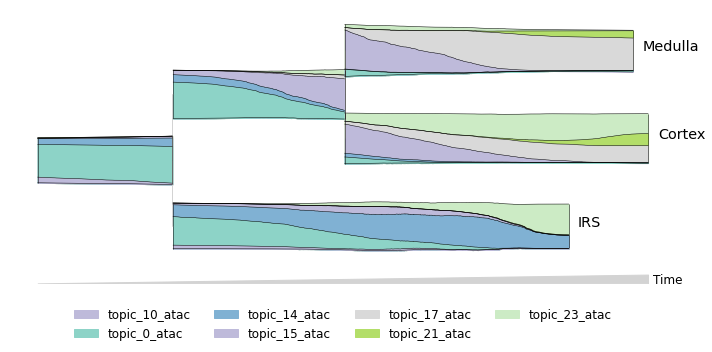

In [11]:
hair_follicle.obs['adj_pseudotime'] = np.log(hair_follicle.obs.mira_pseudotime - 3)
rna_topic_color_palette = [
    sns.color_palette('Set3')[i] for i in [1,7, 5, 3, 2]
] + [[172/255, 107/255, 141/255]]

atac_topic_color_palette = [
    sns.color_palette('Set3')[i] for i in [2, 0, 4, 2, -4, -6, -2]
]

stream_kwargs = dict(hide_feature_threshold=0.03, window_size=301, linewidth=0.5,
                     pseudotime_key = 'adj_pseudotime',log_pseudotime=True, max_bar_height = 0.7)

_, ax = mira.pl.plot_stream(hair_follicle[hair_follicle.obs.mira_pseudotime > 4.7], order = None,
                    data = ['topic_6','topic_9','topic_4','topic_5','topic_22','topic_10'],                      
                   palette=rna_topic_color_palette, legend_cols=4, **stream_kwargs, pseudotime_triangle=False)

mira.pl.plot_stream(hair_follicle[hair_follicle.obs.mira_pseudotime > 4.7], order = None,
                    data = ['topic_10_atac','topic_0_atac','topic_14_atac','topic_15_atac','topic_17_atac','topic_21_atac','topic_23_atac'],
                   palette=atac_topic_color_palette, legend_cols=4, **stream_kwargs)
plt.tight_layout()
plt.savefig(os.path.join(RESULTS, 'fig2', '2c.png'), bbox_inches='tight')

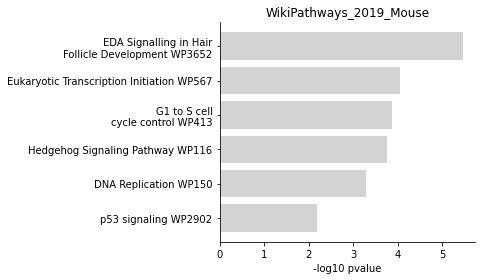

In [12]:
import logging
logging.getLogger().setLevel(logging.WARN)
rna_model.post_topic(6, 500)
rna_model.fetch_topic_enrichments(6, ontologies=['WikiPathways_2019_Mouse'])

rna_model.plot_enrichments(6, show_genes=False, color_by_adj=False, show_top = 6, aspect=1.7)
logging.getLogger().setLevel(logging.INFO)
plt.savefig(os.path.join(RESULTS, 'fig2', '2d_left.svg'), bbox_inches='tight')

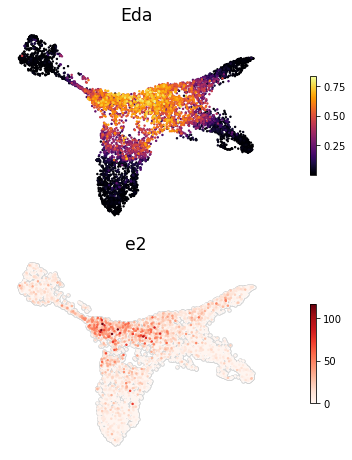

In [13]:
fig, ax = plt.subplots(2,1,figsize=(5,6.5))

mira.plots.base.plot_umap(hair_follicle.obsm['horizontal_umap'], 
                          hair_follicle.obs_vector('topic_6'),
                         add_outline = False, ax = ax[0], palette = "inferno",
                         outline_width=(0, 5))
ax[0].set_title('e2', fontsize='xx-large')

mira.plots.base.plot_umap(hair_follicle.obsm['horizontal_umap'], 
                          hair_follicle.obs_vector('EDA', layer='normalized'),
                         add_outline = True, ax = ax[1], palette = "Reds",
                         outline_width=(0, 5))
ax[1].set_title('e2', fontsize='xx-large')
ax[0].set_title('Eda', fontsize='xx-large')
plt.tight_layout()
plt.savefig(os.path.join(RESULTS, 'fig2', '2c_right.png'), bbox_inches='tight')

Finding enrichments: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 555/555 [00:02<00:00, 195.43it/s]


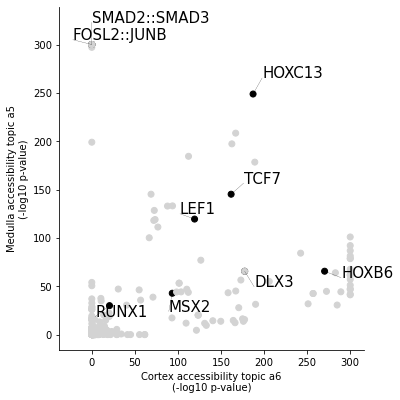

In [14]:
atac_model.get_enriched_TFs(atac_data, topic_num=17, top_quantile=0.1)
atac_model.get_enriched_TFs(atac_data, topic_num=23, top_quantile=0.1)

label_factors = ['LEF1','HOXC13','HOXB6','MSX2','DLX3','SMAD2::SMAD3','FOSL2::JUNB','TCF7','RUNX1']
ax = atac_model.plot_compare_topic_enrichments(23, 17, 
        label_factors = label_factors, hue = {factor : 1. for factor in label_factors},
        fontsize=15, label_closeness=6, figsize=(5.5,5.5), na_color='lightgrey',
        palette = 'Greys_r', show_legend=False,
     )
ax.set(ylabel = 'Medulla accessibility topic a5\n(-log10 p-value)',
      xlabel = 'Cortex accessibility topic a6\n(-log10 p-value)')
plt.savefig(os.path.join(RESULTS, 'fig2', '2e.svg'), bbox_inches='tight')

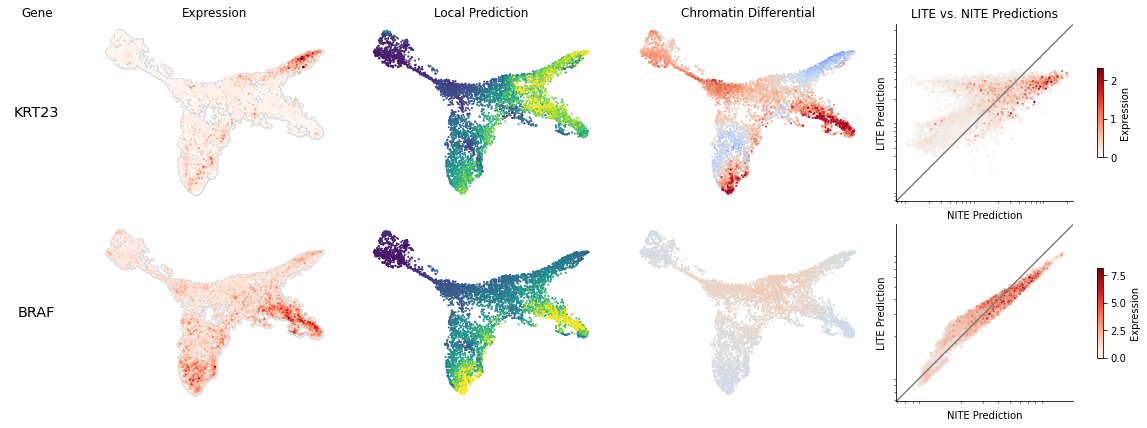

In [15]:
for layer in ['chromatin_differential','LITE_prediction','NITE_prediction', 'normalized','smoothed']:
    hair_follicle.layers[layer] = rna_data[hair_follicle.obs_names, hair_follicle.var_names].layers[layer]

mira.pl.plot_chromatin_differential(hair_follicle, genes = ['KRT23','BRAF'], counts_layer='smoothed', aspect=1.26,
                                   trim_lite_prediction=2, basis = 'horizontal_umap', add_legend=False)
plt.savefig(os.path.join(RESULTS, 'fig3', '3abef_.png'))

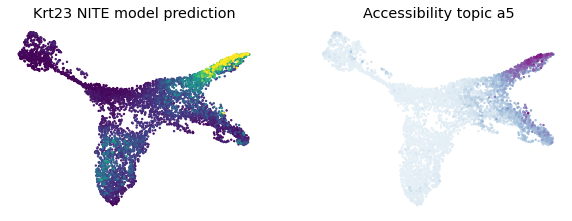

In [16]:
fig, ax = plt.subplots(1,2, figsize=(10,3.5))
mira.plots.base.plot_umap(hair_follicle.obsm['horizontal_umap'], hair_follicle.obs_vector('KRT23', layer='NITE_prediction'),
                         ax= ax[0], add_legend=False, vmax=0.0012)
ax[0].set_title('KRT23 NITE Prediction', fontsize='xx-large')
mira.plots.base.plot_umap(hair_follicle.obsm['horizontal_umap'], hair_follicle.obs_vector('topic_17_atac'),
                         ax= ax[1], add_legend=False, palette = 'BuPu', vmin = -0.1, vmax = 1.0)

ax[0].set_title('Krt23 NITE model prediction', fontsize='x-large')
ax[1].set_title('Accessibility topic a5', fontsize='x-large')
plt.savefig(os.path.join(RESULTS, 'fig3', '3c.png'), bbox_inches='tight')

In [17]:
!pyGenomeTracks --tracks data/code_ocean_results/braf_tracks.ini --region chr6:39705463-39777236 \
        --outFileName "$RESULTS/fig3/3a_right.svg" --dpi 300

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:2.6888480186462402
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 14.0. Dpi is set to 300

INFO:pygenometracks.tracksClass:plotting 1. [x-axis]
/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/site-packages/pygenometracks/tracksClass.py:486: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.axis["x"].axis.set_ticklabels(labels)
INFO:pygenometracks.tracksClass:plotting 2. [genes]
DEBUG:pygenometracks.tracks.GenomeTrack:ylim 100,0
INFO:pygenometracks.tracksClass:plotting cis_models_lef1
INFO:pygenometracks.tracksClass:plotting coverage_b_matrix
INFO:pygenometracks.tracksClass:plotting coverage_medulla
INFO:pygenometracks.tracksClass:plotting coverage_cortex


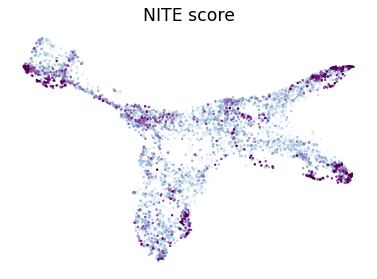

In [18]:
ax = mira.plots.base.plot_umap(hair_follicle.obsm['horizontal_umap'], hair_follicle.obs_vector('NITE_score'),
                         add_legend=False, palette = 'BuPu', vmin = 7, vmax = 35, figsize=(6.5,4.5), size = 2)
ax.set_title('NITE score', fontsize='xx-large')
plt.savefig(os.path.join(RESULTS, 'fig4', '4a.png'), bbox_inches='tight')

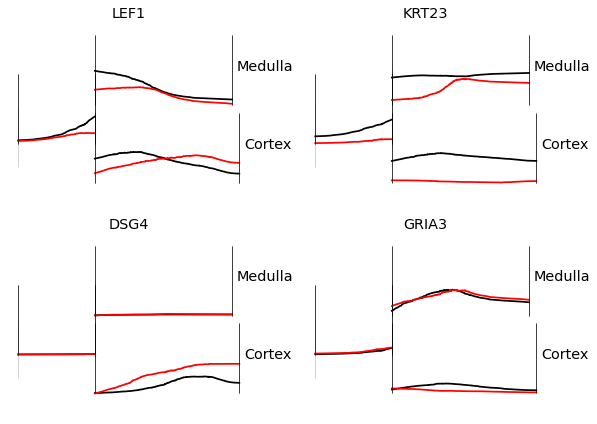

In [19]:
compare_stream_kwargs = dict(style = 'line', show_legend=False,
                             max_bar_height=0.9, scale_features=True, clip=5, 
                             order=None, palette=['red','black'],
                             figsize=(4,3), layers = ['smoothed','LITE_prediction'], 
                             window_size = 351, log_pseudotime = True, 
                             pseudotime_key = 'adj_pseudotime', pseudotime_triangle = False)

def make_plot(ax, gene):
    mira.pl.plot_stream(hair_follicle[(hair_follicle.obs.mira_pseudotime>5.2) & (hair_follicle.obs.tree_states.str.contains('Cortex|Medulla'))], ax = ax,
                    title = gene, data = [gene, gene], **compare_stream_kwargs)

map_plot(make_plot, [[gene] for gene in ['LEF1','KRT23','DSG4','GRIA3']], 
         plots_per_row=2,  height = 3, aspect = 1.4)
plt.savefig(os.path.join(RESULTS, 'fig4', '4c_right.svg'), bbox_inches='tight')

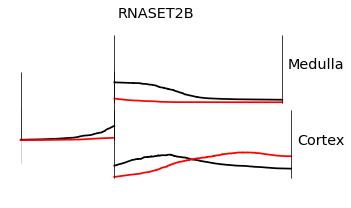

In [20]:
def make_plot(ax, gene):
    mira.pl.plot_stream(hair_follicle[(hair_follicle.obs.mira_pseudotime>5.2) & (hair_follicle.obs.tree_states.str.contains('Cortex|Medulla'))], ax = ax,
                    title = gene, data = [gene, gene], **compare_stream_kwargs)
    
fig, ax = plt.subplots(1,1,figsize=(5,3))
make_plot(ax, 'RNASET2B')
plt.savefig(os.path.join(RESULTS, 'fig4','4b.svg'), bbox_inches='tight')

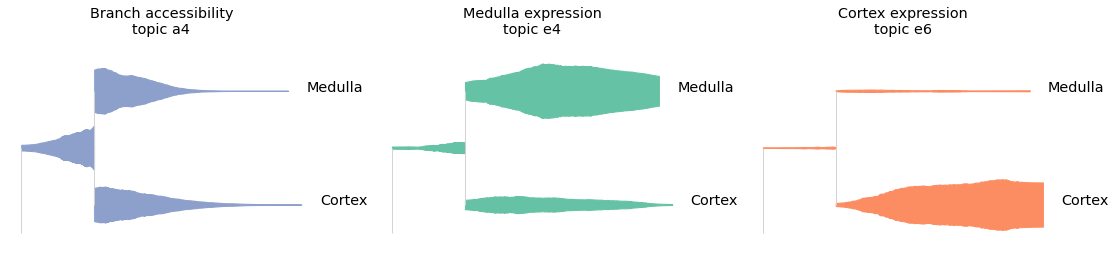

In [21]:
hair_follicle.obs['adj_pseudotime'] = np.log(hair_follicle.obs.mira_pseudotime + 1)
map_plot(lambda ax, x, c, t : mira.pl.plot_stream(hair_follicle[~hair_follicle.obs.tree_states.str.contains('IRS')],
                       data = x, color = c, ax = ax, pseudotime_triangle=False, title = t, pseudotime_key = 'adj_pseudotime'),
         [('topic_15_atac', sns.color_palette('Set2')[2], 'Branch accessibility\ntopic a4'), 
          ('topic_5', sns.color_palette('Set2')[0],'Medulla expression\ntopic e4'),
          ('topic_10', sns.color_palette('Set2')[1], 'Cortex expression\ntopic e6')], height =4, aspect = 1.3)
plt.savefig(os.path.join(RESULTS, 'fig4','4f.svg'), bbox_inches='tight')

Trying to set attribute `.obs` of view, copying.
/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'true_cell' as categorical
/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'tree_states' as categorical


/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'hairshaft' as categorical


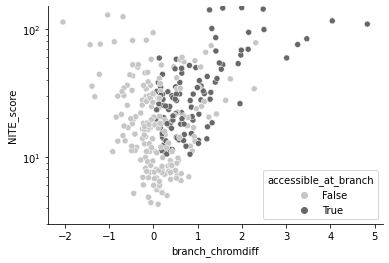

In [22]:
with open(DIR + 'rp_model_genes.txt','r') as f: 
    rp_genes = [x.strip() for x in f] + ['JAG1']

tree_states = pd.read_csv(DIR + 'tree_states.tsv', sep = '\t')
hair_follicle.obs = hair_follicle.obs.drop(columns = 'tree_states').join(tree_states.set_index('barcode'), how = 'left')
hair_follicle = hair_follicle[:, rp_genes ]

hair_follicle.obs['branch_cell'] = np.isin(np.arange(len(hair_follicle)), atac_data[hair_follicle.obs_names].obs.topic_15.argsort().tail(150).values)
hair_follicle.var['branch_chromdiff'] = np.nanmean(hair_follicle[hair_follicle.obs.branch_cell,:].layers['chromatin_differential'].toarray(), axis = 0)

sc.tl.rank_genes_groups(hair_follicle, groupby='tree_states', groups=['Cortex'], reference='Medulla', method='wilcoxon')
lineage_DE = sc.get.rank_genes_groups_df(hair_follicle, group='Cortex').set_index('names')
lineage_DE_genes = lineage_DE[(lineage_DE.pvals_adj <= 0.1) & (np.abs(lineage_DE.logfoldchanges) >= 1)].index.values

fig4_genes = np.intersect1d(lineage_DE_genes, atac_data.uns['distance_to_TSS_genes'])

hair_follicle.obs['hairshaft'] = hair_follicle.obs.tree_states.map({'Cortex' : 'Cortex', 'Medulla': 'Medulla', 'Medulla, Cortex' : 'pre-HS', 'Medulla, Cortex, IRS' : 'pre-HS', 'IRS' : 'IRS'})

sc.tl.rank_genes_groups(hair_follicle, groupby='hairshaft', groups=['Cortex','Medulla'], reference='pre-HS', method='wilcoxon')
medulla_hairshaft_DE = sc.get.rank_genes_groups_df(hair_follicle, group='Medulla')
cortex_hairshaft_DE = sc.get.rank_genes_groups_df(hair_follicle, group='Cortex')

not_expressed_at_branch_genes = np.union1d(
    medulla_hairshaft_DE[(medulla_hairshaft_DE.logfoldchanges > 1) & (medulla_hairshaft_DE.pvals_adj < 0.1)].names.values,
    cortex_hairshaft_DE[(cortex_hairshaft_DE.pvals_adj < 0.1) & (cortex_hairshaft_DE.logfoldchanges > 1)].names.values)

hair_follicle.var['isd_genes'] = hair_follicle.var_names.isin(fig4_genes)
hair_follicle.var['expressed_at_branch'] = ~hair_follicle.var_names.isin(not_expressed_at_branch_genes) & hair_follicle.var.isd_genes
hair_follicle.var['NITE_score'] = rna_data.var['NITE_score']
hair_follicle.var['accessible_at_branch'] = (hair_follicle.var.branch_chromdiff > 0.05) & (hair_follicle.var.NITE_score > 10) & hair_follicle.var.isd_genes & ~hair_follicle.var.expressed_at_branch
hair_follicle.var['accessible_after_branch'] = ~(hair_follicle.var.expressed_at_branch | hair_follicle.var.accessible_at_branch) & hair_follicle.var.isd_genes
hair_follicle.var['cortex_DE'] = ((lineage_DE.logfoldchanges.values > 1) & (lineage_DE.pvals_adj < 0.1)) & (lineage_DE.logfoldchanges > 1)
hair_follicle.var['medulla_DE'] = ((lineage_DE.logfoldchanges.values < 1) & (lineage_DE.pvals_adj < 0.1)) & (lineage_DE.logfoldchanges < -1)

ax = sns.scatterplot(
    data=hair_follicle.var.loc[lineage_DE_genes],
    x = 'branch_chromdiff',
    y = 'NITE_score',
    hue = 'accessible_at_branch',
    palette='Greys'
)
ax.set(yscale = 'log')
ax.set(ylim = (3, 150))
sns.despine()

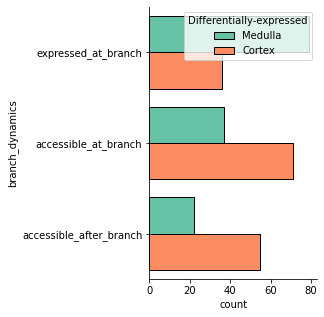

In [23]:
categories = np.array(['expressed_at_branch','accessible_at_branch','accessible_after_branch'])
hair_follicle.var['branch_dynamics'] = categories[hair_follicle.var[categories].values.argmax(-1)]

hair_follicle.var['Differentially-expressed'] = np.where(hair_follicle.var.cortex_DE, 'Cortex','Medulla')

fig, ax = plt.subplots(1,1,figsize=(3,5))
sns.countplot(data = hair_follicle.var[hair_follicle.var.isd_genes],
             y = 'branch_dynamics', hue = 'Differentially-expressed', order = categories,
             palette = 'Set2', saturation=1., edgecolor = 'black', ax = ax)
sns.despine()
plt.savefig(os.path.join(RESULTS, 'fig4', '4c_left.svg'), bbox_inches='tight')

/Users/alynch/opt/miniconda3/envs/mirarep/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


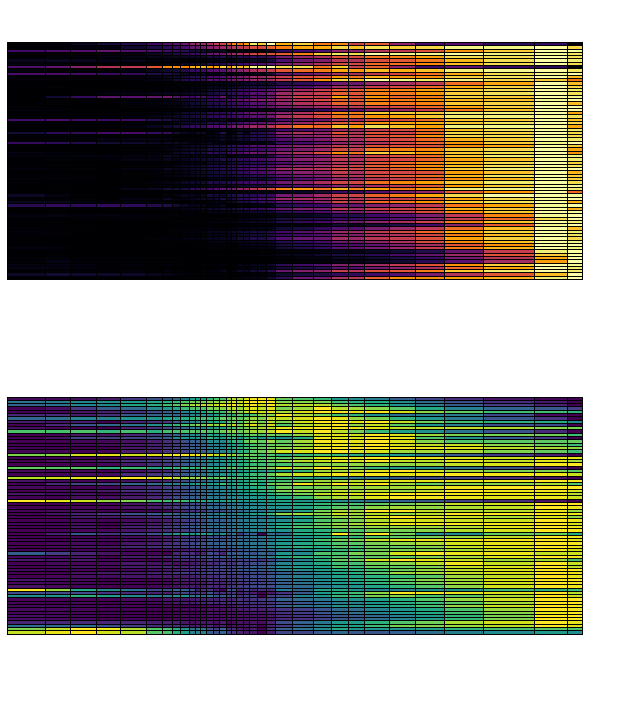

In [24]:
cortex_primed = hair_follicle.var_names[hair_follicle.var.isd_genes & hair_follicle.var.accessible_at_branch & hair_follicle.var.cortex_DE].values
medulla_primed = hair_follicle.var_names[hair_follicle.var.isd_genes & hair_follicle.var.accessible_at_branch & hair_follicle.var.medulla_DE].values

order = cortex_primed
plot_data = hair_follicle[hair_follicle.obs.tree_states.str.contains('Cortex') \
                                          & (hair_follicle.obs.mira_pseudotime > 4.5) & (hair_follicle.obs.mira_pseudotime < 9)]
corrs = [
    np.corrcoef(np.log(plot_data.obs_vector('topic_15_atac')), np.log(plot_data.obs_vector(gene, layer = 'LITE_prediction')))[0,1]
    for gene in order
]

order = order[np.argsort(corrs)[::-1]]
plot_data.layers['LITE_prediction'] = np.log(plot_data.layers['LITE_prediction'].toarray())

fig, ax = plt.subplots(2,1,figsize=(10,10))

mira.pl.plot_stream(plot_data, ax=ax[0],
                data = list(order) + ['topic_10'], layers = ['NITE_prediction']*len(order) + [None], palette='inferno', linecolor = None, 
                   window_size=71, style='heatmap', order = None, pseudotime_triangle=False, tree_structure=False)
ax[0].set(yticks = [])

mira.pl.plot_stream(plot_data, ax=ax[1],
                   data = ['topic_15_atac'] + list(order), layers = [None] + ['LITE_prediction']*len(order), palette='viridis', scaffold_linecolor= None,
                   window_size=71, style='heatmap', order = None, pseudotime_triangle=False, tree_structure=False)
ax[1].set(yticks = [])
plt.savefig(os.path.join(RESULTS, 'fig4', '4d_left.svg'), bbox_inches='tight')

INFO:mira.tools.tf_targeting:Testing with 71 query genes and 4583 background genes, against 555 factors
Testing factors: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 555/555 [00:01<00:00, 454.05it/s]
INFO:mira.tools.tf_targeting:Testing with 37 query genes and 4583 background genes, against 555 factors
Testing factors: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 555/555 [00:01<00:00, 465.59it/s]


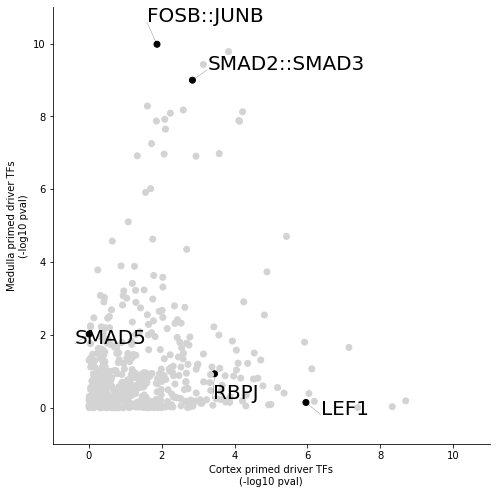

In [25]:
label = ['LEF1','RBPJ','SMAD2::SMAD3','SMAD5','FOSB::JUNB']
ax = mira.pl.compare_driver_TFs_plot(hair_follicle, color = 'lightgrey', fontsize=20,
            geneset1=cortex_primed, geneset2=medulla_primed,
            label_factors=label, palette = 'Greys_r', ax = None, figsize=(7,7),
            hue = {factor : 1. for factor in label}, show_legend=False, label_closeness=7,
            background = np.setdiff1d(rp_genes, lineage_DE_genes),
            axlabels = ('Cortex primed driver TFs\n(-log10 pval)', 'Medulla primed driver TFs\n(-log10 pval)')
)
plt.axis('square')
ax.set(ylim = (-1,11),xlim = (-1,11))
plt.savefig(os.path.join(RESULTS, 'fig4', '4e.svg'))